In [2]:
pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transformation to convert images to tensors
transform = transforms.ToTensor()

# Download and load the training and testing data for MNIST
train_dataset = datasets.MNIST(root='Home Work./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='Home Work./data', train=False, download=True, transform=transform)

# Create data loaders for both training and testing datasets
train_loader = DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=10, shuffle=False)


In [3]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: Home Work./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: Home Work./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
convul1 = nn.Conv2d(1, 8, 3, 1)
convul2 = nn.Conv2d(8, 18, 3, 1)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=18, kernel_size=3, stride=1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=5*5*18, out_features=18)
        self.fc2 = nn.Linear(in_features=18, out_features=10)
                
    def forward(self, x):
        # Apply first convolution followed by ReLU and max pooling
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Apply second convolution followed by ReLU and max pooling
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Flatten the tensor before passing to fully connected layers
        x = x.view(-1, 5*5*18)
        
        # Apply fully connected layers with ReLU in between
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        # Apply log softmax to the final output
        return F.log_softmax(x, dim=1)


In [7]:
model1 = ConvNet()
print(model1)


ConvNet(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 18, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=450, out_features=18, bias=True)
  (fc2): Linear(in_features=18, out_features=10, bias=True)
)


In [8]:
crit_loss1 = nn.CrossEntropyLoss()
optim1 = torch.optim.Adam(model1.parameters(), lr=0.001)


In [9]:
# Define the number of epochs
epochs = 20


train_losses1 = []
test_losses1 = []
train_correct1 = []
test_correct1 = []

# Loop over each epoch
for epoch in range(epochs):
    train_corr1 = 0
    test_corr1 = 0
    total_train_loss = 0  # Initialize train loss accumulator

    # Training phase
    model1.train()  # Set the model in training mode
    for batch_idx, (x_train, y_train) in enumerate(train_loader):
        
        # Forward pass: Compute predictions and loss
        y_pred = model1(x_train)
        loss = crit_loss1(y_pred, y_train)

        # Get predicted labels and calculate correct predictions for the batch
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()  # Convert to scalar
        train_corr1 += batch_corr

        # Backpropagation and optimization
        optim1.zero_grad()  # Zero out previous gradients
        loss.backward()  # Backpropagate the loss
        optim1.step()  # Update model parameters

        total_train_loss += loss.item()  # Accumulate the loss for this batch

    # Store the average training loss and correct predictions after each epoch
    train_losses1.append(total_train_loss / len(train_loader))
    train_correct1.append(train_corr1)
    
    # Testing phase (with no gradient computation)
    model1.eval()  # Set the model in evaluation mode
    total_test_loss = 0  # Initialize test loss accumulator
    with torch.no_grad():
        for batch_idx, (x_test, y_test) in enumerate(test_loader):
            # Forward pass: Compute predictions and loss for test set
            y_val = model1(x_test)
            loss = crit_loss1(y_val, y_test)
            total_test_loss += loss.item()

          
            predicted = torch.max(y_val.data, 1)[1]
            test_corr1 += (predicted == y_test).sum().item()

   
    test_losses1.append(total_test_loss / len(test_loader))
    test_correct1.append(test_corr1)
    
    
    print(f'Epoch {epoch + 1}/{epochs} => Train Loss: {train_losses1[-1]:.4f}, '
          f'Train Accuracy: {train_corr1 / len(train_loader.dataset):.4f}, '
          f'Test Loss: {test_losses1[-1]:.4f}, '
          f'Test Accuracy: {test_corr1 / len(test_loader.dataset):.4f}')


Epoch 1/20 => Train Loss: 0.2374, Train Accuracy: 0.9242, Test Loss: 0.0770, Test Accuracy: 0.9766
Epoch 2/20 => Train Loss: 0.0795, Train Accuracy: 0.9751, Test Loss: 0.0501, Test Accuracy: 0.9834
Epoch 3/20 => Train Loss: 0.0616, Train Accuracy: 0.9813, Test Loss: 0.0524, Test Accuracy: 0.9826
Epoch 4/20 => Train Loss: 0.0511, Train Accuracy: 0.9841, Test Loss: 0.0420, Test Accuracy: 0.9857
Epoch 5/20 => Train Loss: 0.0451, Train Accuracy: 0.9858, Test Loss: 0.0398, Test Accuracy: 0.9865
Epoch 6/20 => Train Loss: 0.0404, Train Accuracy: 0.9868, Test Loss: 0.0529, Test Accuracy: 0.9823
Epoch 7/20 => Train Loss: 0.0354, Train Accuracy: 0.9891, Test Loss: 0.0350, Test Accuracy: 0.9881
Epoch 8/20 => Train Loss: 0.0337, Train Accuracy: 0.9892, Test Loss: 0.0391, Test Accuracy: 0.9873
Epoch 9/20 => Train Loss: 0.0314, Train Accuracy: 0.9897, Test Loss: 0.0366, Test Accuracy: 0.9884
Epoch 10/20 => Train Loss: 0.0290, Train Accuracy: 0.9912, Test Loss: 0.0326, Test Accuracy: 0.9885
Epoch 11/

In [10]:
train_losses1=torch.tensor(train_losses1)

In [ ]:
################################## Training Actual Tasks, CNN with MNIST model 2 #############################

In [11]:



con1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=4, stride=1)

con2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=1)


In [12]:


class ConvolNetwork2(nn.Module):
    def __init__(self):
        super(ConvolNetwork2, self).__init__()
        
        # Define the first convolutional layer: input (1 channel), output (6 channels), kernel size 4x4
        self.convul1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=4, stride=1)
        
     
        self.convul2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=1)
        
     
        self.fc1 = nn.Linear(in_features=4*4*16, out_features=16)
        
      
        self.fc2 = nn.Linear(in_features=16, out_features=14)
        
        
        self.fc3 = nn.Linear(in_features=14, out_features=10)
                
    def forward(self, y):
        # Apply first convolutional layer followed by ReLU activation and max pooling
        y = F.relu(self.convul1(y))
        y = F.max_pool2d(y, kernel_size=2, stride=2)
        
        # Apply second convolutional layer ing
        y = F.relu(self.convul2(y))
        y = F.max_pool2d(y, kernel_size=2, stride=2)
        
        # Flatten the output from the convolutional layers
        y = y.view(-1, 4*4*16)
        
        # Pass through fully connected layers with ReLU activations
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        
        # Final output layer with log softmax for classification
        y = self.fc3(y)
        return F.log_softmax(y, dim=1)


In [14]:
model2 = ConvolNetwork2()
print(model2)


ConvolNetwork2(
  (convul1): Conv2d(1, 6, kernel_size=(4, 4), stride=(1, 1))
  (convul2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=14, bias=True)
  (fc3): Linear(in_features=14, out_features=10, bias=True)
)


In [16]:
import torch.nn as nn
import torch.optim as optim

# Define the loss function (CrossEntropyLoss is appropriate for classification tasks)
crit_loss2 = nn.CrossEntropyLoss()

# Define the Adam optimizer with a learning rate of 0.001
optim2 = optim.Adam(model2.parameters(), lr=0.001)


In [17]:
epochs = 20
train_losses2 = []
test_losses2 = []
train_correct2 = []
test_correct2 = []

for i in range(epochs):
    train_corr2 = 0
    test_corr2 = 0
    total_train_loss2 = 0  # Initialize variable to accumulate training loss
    
    # Training the batches
    model2.train()  
    for b, (x_train, y_train) in enumerate(train_loader):
        
        
        y_pred2 = model2(x_train)
        
        
        loss2 = crit_loss2(y_pred2, y_train)
        
       
        predicted2 = torch.max(y_pred2.data, 1)[1]
        batch_corr2 = (predicted2 == y_train).sum().item()  r
        train_corr2 += batch_corr2
        
        optim2.zero_grad()  
        loss2.backward()  
        optim2.step()  
        
        total_train_loss2 += loss2.item()  
    
   
    train_losses2.append(total_train_loss2 / len(train_loader)) 
    train_correct2.append(train_corr2)
    
    model2.eval()  
    total_test_loss2 = 0  
    with torch.no_grad():  
        for b, (x_test, y_test) in enumerate(test_loader):
            
            
            y_val = model2(x_test)
            
            
            predicted2 = torch.max(y_val.data, 1)[1]
            test_corr2 += (predicted2 == y_test).sum().item()  
            
         
            loss2 = crit_loss2(y_val, y_test)
            total_test_loss2 += loss2.item()
    
   
    test_losses2.append(total_test_loss2 / len(test_loader))  
    test_correct2.append(test_corr2)
    
   
    print(f'Epoch {i + 1}/{epochs} => Train Loss: {train_losses2[-1]:.4f}, '
          f'Train Accuracy: {train_corr2 / len(train_loader.dataset):.4f}, '
          f'Test Loss: {test_losses2[-1]:.4f}, '
          f'Test Accuracy: {test_corr2 / len(test_loader.dataset):.4f}')


Epoch 1/20 => Train Loss: 0.2506, Train Accuracy: 0.9205, Test Loss: 0.1065, Test Accuracy: 0.9671
Epoch 2/20 => Train Loss: 0.0966, Train Accuracy: 0.9709, Test Loss: 0.0721, Test Accuracy: 0.9759
Epoch 3/20 => Train Loss: 0.0750, Train Accuracy: 0.9777, Test Loss: 0.0565, Test Accuracy: 0.9825
Epoch 4/20 => Train Loss: 0.0632, Train Accuracy: 0.9806, Test Loss: 0.0514, Test Accuracy: 0.9842
Epoch 5/20 => Train Loss: 0.0544, Train Accuracy: 0.9831, Test Loss: 0.0467, Test Accuracy: 0.9866
Epoch 6/20 => Train Loss: 0.0481, Train Accuracy: 0.9850, Test Loss: 0.0507, Test Accuracy: 0.9838
Epoch 7/20 => Train Loss: 0.0439, Train Accuracy: 0.9866, Test Loss: 0.0439, Test Accuracy: 0.9865
Epoch 8/20 => Train Loss: 0.0402, Train Accuracy: 0.9875, Test Loss: 0.0483, Test Accuracy: 0.9850
Epoch 9/20 => Train Loss: 0.0373, Train Accuracy: 0.9882, Test Loss: 0.0374, Test Accuracy: 0.9881
Epoch 10/20 => Train Loss: 0.0348, Train Accuracy: 0.9889, Test Loss: 0.0391, Test Accuracy: 0.9886
Epoch 11/

In [25]:
# If train_losses2 is already a tensor, use clone().detach() instead of torch.tensor()
train_losses2 = train_losses2.clone().detach()


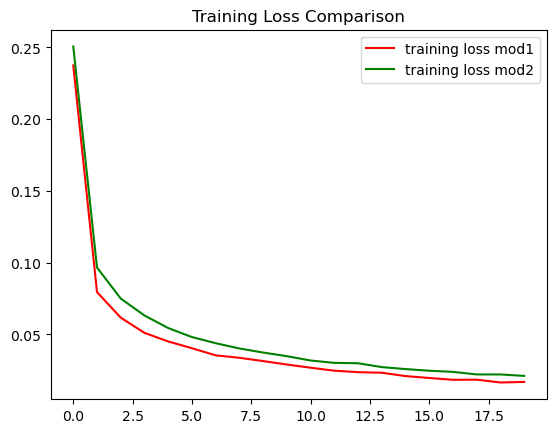

In [31]:
### Plotting training loss on all models  
plt.plot(train_losses1.detach().numpy(),'r', label='training loss mod1')
plt.plot(train_losses2.detach().numpy(),'g', label='training loss mod2')
plt.title('Training Loss Comparison')
plt.legend();

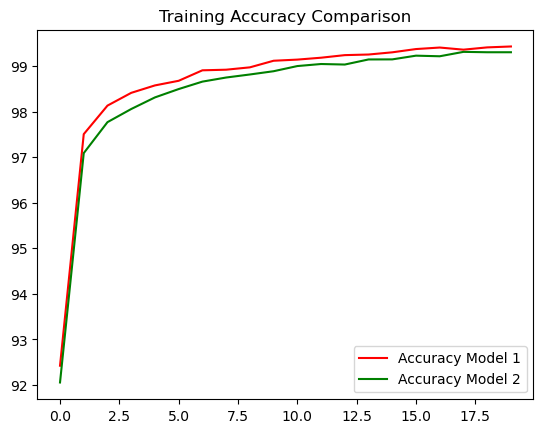

In [34]:
import matplotlib.pyplot as plt
plt.plot([t / 600 for t in train_correct1], 'r', label='Accuracy Model 1')
plt.plot([t / 600 for t in train_correct2], 'g', label='Accuracy Model 2')

plt.title('Training Accuracy Comparison')
plt.legend()
plt.show()
